# Autoencoder

## Artificial

```{note}
We're getting there. So the figure you've shared is wrong. Just give Python code and, uh, a layer that has, uh, input hidden and output. What you've shown is a mumbo-jumbo and it's not even directed. Our arrow's in different directions, opposite directions. That's wrong. Please just give us a classical one here. Could you even give the Python code?
```

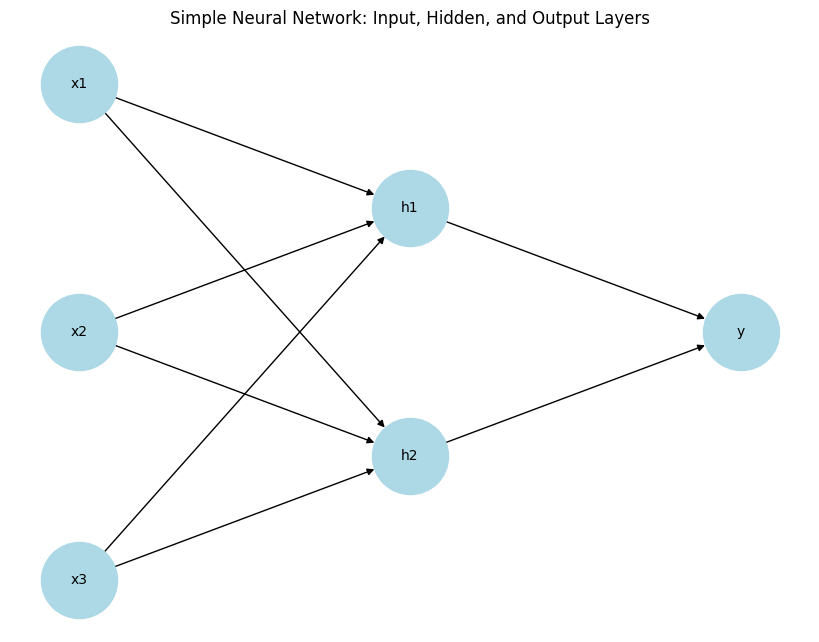

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph for a simple neural network
G = nx.DiGraph()

# Add nodes for input, hidden, and output layers
layers = {
    "Input Layer": ["x1", "x2", "x3"],
    "Hidden Layer": ["h1", "h2"],
    "Output Layer": ["y"]
}

# Adding nodes to the graph
for layer, nodes in layers.items():
    for node in nodes:
        G.add_node(node, layer=layer)

# Add edges (directed connections between layers with weights)
edges = [
    ("x1", "h1"), ("x1", "h2"),
    ("x2", "h1"), ("x2", "h2"),
    ("x3", "h1"), ("x3", "h2"),
    ("h1", "y"),
    ("h2", "y")
]

# Add edges to the graph
G.add_edges_from(edges)

# Position the nodes using a layer-based layout
pos = {
    "x1": (0, 2), "x2": (0, 1), "x3": (0, 0),
    "h1": (1, 1.5), "h2": (1, 0.5),
    "y": (2, 1)
}

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", arrows=True, font_size=10)
plt.title("Simple Neural Network: Input, Hidden, and Output Layers")
plt.show()

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
_Machine Learning for Dummies like Me_. This is the classical representation of a simple neural network with an input layer (`inferno`), a hidden layer (`limbo`), and an output layer (`paradiso`), depicted with correct directed arrows. Additionally, above you'll find the Python code used to generate this neural network visualization using the networkx and matplotlib libraries. This diagram accurately represents the flow (`salvation`) from the input layer to the hidden layer and then to the output layer with directed arrows. And for the record, if you return to Mozart's [Corriamo, Fuggiamo](https://www.youtube.com/watch?v=CPqZSwBVtRs) on the previous page, I'll have you know that its "hidden layer" yielded forth the opening movement of Beethoven's Symphony No. 9, which is also in "Mozart-dark" D minor!!
```

<iframe width="560" height="315" src="https://www.youtube.com/embed/4IqnVCc-Yqo" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


> Okay, now this makes sense, except that you have two nodes in the hidden layer and one node in the outer layer. Is that correct? I thought the outer layer is supposed to have the same nodes as inner layer, because they're a representation, as input layer.

In a typical neural network, the number of nodes in the input layer does not necessarily match the number of nodes in the hidden or output layers. Each layer can have a different number of nodes depending on the design of the network and the problem it’s trying to solve.

Here's the breakdown:

- **Input Layer:** The input layer represents the features (or data points) you're feeding into the network. Each input node corresponds to one feature.
  
- **Hidden Layer:** The hidden layer can have any number of nodes depending on the complexity of the relationships the network needs to learn. It’s where the network "processes" the inputs through learned weights and activation functions.

- **Output Layer:** The number of nodes in the output layer is determined by the task. For example:
  - If you're doing **regression**, you'd typically have one output node representing the predicted value.
  - For **binary classification**, you’d also often have one output node (with a sigmoid activation to output probabilities).
  - In **multiclass classification**, the output layer could have one node per class.

In the example I shared:
- There are 3 nodes in the input layer (representing 3 features).
- There are 2 nodes in the hidden layer (this is arbitrary and depends on the design).
- There is **1 node** in the output layer, which is typical for regression or binary classification tasks.

If you were expecting the number of output nodes to match the input nodes (e.g., for something like autoencoders), that would only apply in specific cases like reconstructing inputs. Would you like to modify the diagram to match such a scenario (e.g., 3 nodes in both input and output layers)?

> Okay, I got you. Now, could you give me the matrix algebra to correspond to this exact node? And I really wish you could give me examples of what is in Node 3.201. When you say feature, I want examples. Thank you.

Let's walk through the matrix algebra for the neural network diagram you referenced (with 3 input nodes, 2 hidden nodes, and 1 output node). Then, I'll explain what kind of features might go into those input nodes to make this concrete.

### Matrix Algebra

In this neural network, there are three layers:
1. **Input Layer:** 3 nodes $(x_1, x_2, x_3$) represent the features.
2. **Hidden Layer:** 2 nodes $(h_1, h_2$) represent the hidden layer neurons.
3. **Output Layer:** 1 node $(y$) is the final output.

#### Step 1: Input to Hidden Layer
We have a weight matrix $W_1$ that connects the input layer to the hidden layer. The input is $X = [x_1, x_2, x_3]^T$, and the weight matrix $W_1$ is:

$
W_1 = \begin{bmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22} \\
w_{31} & w_{32}
\end{bmatrix}
$

The hidden layer activations $ H = [h_1, h_2]^T $ are calculated as:

$
H = W_1^T X + B_1 = \begin{bmatrix}
w_{11}x_1 + w_{21}x_2 + w_{31}x_3 + b_1 \\
w_{12}x_1 + w_{22}x_2 + w_{32}x_3 + b_2
\end{bmatrix}
$

Where $B_1 = [b_1, b_2]^T$ are the biases for the hidden layer. The hidden layer activations $h_1$ and $h_2$ typically go through a non-linear activation function (like ReLU or sigmoid), but for simplicity, we won't apply that yet.

#### Step 2: Hidden to Output Layer
The weights from the hidden layer to the output layer are stored in a matrix $W_2$:

$
W_2 = \begin{bmatrix} w_{13} & w_{23} \end{bmatrix}
$

The output node $ y $ is calculated as:

$
y = W_2 H + B_2 = w_{13}h_1 + w_{23}h_2 + b_3
$

Where $B_2 = b_3$ is the bias for the output layer. This output might then go through an activation function like a sigmoid for binary classification or be left as is for regression.

### Putting It All Together:
1. Compute the weighted sum of inputs for the hidden layer:
   $
   h_1 = w_{11}x_1 + w_{21}x_2 + w_{31}x_3 + b_1
   $
   $
   h_2 = w_{12}x_1 + w_{22}x_2 + w_{32}x_3 + b_2
   $

2. Compute the final output as a weighted sum of hidden layer activations:
   $
   y = w_{13}h_1 + w_{23}h_2 + b_3
   $

### Example of Features in Node $x_1, x_2, x_3$

In practice, **features** refer to measurable attributes or properties of the data you're feeding into the network. For example, imagine you're building a simple neural network to predict whether a house will sell based on some features of the house. Your input features might be:

- **$x_1$: Size of the house (e.g., in square feet)**
- **$x_2$: Number of bedrooms**
- **$x_3$: Age of the house (e.g., in years)**

These values go into the input layer. The hidden layer then learns a weighted combination of these inputs to produce intermediate values (activations), and the output layer might give a single value representing the probability of the house selling.

### Case for Node $x_3$
Let’s say:

- $x_1 = 2000$ (square feet)
- $x_2 = 3$ (bedrooms)
- $x_3 = 10$ (age of the house)

The network uses these values as inputs, processes them through the hidden layer, and outputs a prediction. For example, $x_3 = 10$ represents the feature of **age** in years. The weight matrices and biases adjust how important each feature is for the final prediction.

---

Let me know if you'd like further clarification, or if you'd like to see a more complex example!

> I like this. It's now concrete, the example. So I see you've given examples of X1, X2. What about the H? The H examples. Could I see that? Then the Y. Yeah, thank you.

Let's take the next step and make the **hidden layer** activations $h_1$ and $h_2$ more concrete, along with the output $y$. 

### Concrete Examples for $ h_1 $ and $ h_2 $ (Hidden Layer Activations)

Recall that the hidden layer nodes $h_1$ and $h_2$ are computed as weighted sums of the input nodes $x_1, x_2, x_3$, plus a bias term.

Let’s assume we have the following weights and biases:

$
W_1 = \begin{bmatrix}
0.5 & -0.3 \\
0.8 & 0.2 \\
-0.6 & 0.4
\end{bmatrix}, \quad B_1 = \begin{bmatrix} 0.1 \\ -0.2 \end{bmatrix}
$

The input values are:
- $x_1 = 2000$ (size of the house in square feet),
- $x_2 = 3$ (number of bedrooms),
- $x_3 = 10$ (age of the house in years).

#### Step 1: Calculate $ h_1 $ and $ h_2 $
For $ h_1 $:
$
h_1 = (0.5 \cdot 2000) + (0.8 \cdot 3) + (-0.6 \cdot 10) + 0.1
$
$
h_1 = 1000 + 2.4 - 6 + 0.1 = 996.5
$

For $ h_2 $:
$
h_2 = (-0.3 \cdot 2000) + (0.2 \cdot 3) + (0.4 \cdot 10) - 0.2
$
$
h_2 = -600 + 0.6 + 4 - 0.2 = -595.6
$

So, we have:
$
h_1 = 996.5, \quad h_2 = -595.6
$

### Concrete Example for $ y $ (Output Layer)

Now let’s compute the output node $y$ using the hidden layer activations $ h_1 $ and $ h_2 $.

Assume we have the weights and bias for the output layer as:

$
W_2 = \begin{bmatrix} 0.7 & -0.5 \end{bmatrix}, \quad B_2 = 0.5
$

The output $ y $ is calculated as:

$
y = (0.7 \cdot 996.5) + (-0.5 \cdot -595.6) + 0.5
$
$
y = 697.55 + 297.8 + 0.5 = 995.85
$

So, the final output $ y = 995.85 $.

### Interpretation:

1. **$h_1$** and **$h_2$** represent intermediate values that the hidden layer neurons compute. These values depend on the input features and how important each feature is (determined by the weights).
2. **$y$** is the final output, which could represent something like the predicted price of a house. 

In this case, the output $ y = 995.85 $ might represent the likelihood or some other prediction based on the weights and inputs provided.

Does this help clarify how the hidden and output layers function? Let me know if you'd like to explore anything further!

> Do you think you could give a similar example? This time the inputs being, I don't know what they would be for an image. I guess they'll be pixels or something like that. You could give an elaborate example of an image and what the units of the input are of the image. Pixels? I'm thinking pixels? I don't know. Frames? Yeah, and you walk me through stuff.

Yes, you're absolutely right! For images, the inputs to a neural network are typically **pixels**. Let me walk you through a simple example of how this works with an image input.

### Step 1: Image as Input

When dealing with images, each pixel represents a certain intensity of light or color. The image is typically broken down into a grid of pixels, and each pixel has a value that represents the color (or grayscale) intensity at that location.

- **For grayscale images:** Each pixel is a single value between 0 and 255, where 0 is black and 255 is white.
- **For color images (like RGB):** Each pixel has 3 values, representing the intensity of Red, Green, and Blue (hence "RGB"), with values between 0 and 255.

#### Example:
Let’s take a **very simple image** of size **2x2 pixels** in grayscale to keep things clear. This means there are 4 pixels in total. Each pixel will have a value. Here's an example of the pixel values:

$
\text{Image} = \begin{bmatrix}
200 & 50 \\
30 & 220
\end{bmatrix}
$

This is a 2x2 grayscale image with 4 pixel values. 

- The top-left pixel has an intensity of **200** (darker gray),
- The top-right pixel has an intensity of **50** (light gray),
- The bottom-left pixel has an intensity of **30** (even lighter gray),
- The bottom-right pixel has an intensity of **220** (almost white).

### Step 2: Input Layer (Flattening the Image)
In order to feed the image into a neural network, we need to **flatten** it into a vector (a single row of values). 

So, the 2x2 image becomes:

$
X = \begin{bmatrix} 200 & 50 & 30 & 220 \end{bmatrix}^T
$

This vector of 4 values is the **input layer** to the network, with 4 nodes, each corresponding to one pixel.

### Step 3: Hidden Layer

Let’s say we have a hidden layer with 3 neurons. The weights connecting the input layer (4 pixels) to the hidden layer (3 neurons) would be in a matrix $W_1$, where each pixel is connected to each neuron in the hidden layer.

$
W_1 = \begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
w_{31} & w_{32} & w_{33} \\
w_{41} & w_{42} & w_{43}
\end{bmatrix}
$

This matrix represents the weights between the 4 input pixels and the 3 hidden layer neurons. If we choose random weights and biases, say:

$
W_1 = \begin{bmatrix}
0.2 & -0.3 & 0.5 \\
0.7 & 0.1 & -0.4 \\
-0.6 & 0.2 & 0.9 \\
0.4 & -0.7 & 0.3
\end{bmatrix}, \quad B_1 = \begin{bmatrix} 0.1 \\ 0.2 \\ -0.1 \end{bmatrix}
$

The hidden layer activations $H = [h_1, h_2, h_3]^T$ are calculated as:

$
H = W_1^T X + B_1
$

$
H = \begin{bmatrix}
(0.2 \cdot 200) + (0.7 \cdot 50) + (-0.6 \cdot 30) + (0.4 \cdot 220) + 0.1 \\
(-0.3 \cdot 200) + (0.1 \cdot 50) + (0.2 \cdot 30) + (-0.7 \cdot 220) + 0.2 \\
(0.5 \cdot 200) + (-0.4 \cdot 50) + (0.9 \cdot 30) + (0.3 \cdot 220) - 0.1
\end{bmatrix}
$

Let’s compute these:

$
h_1 = (40) + (35) + (-18) + (88) + 0.1 = 145.1
$
$
h_2 = (-60) + (5) + (6) + (-154) + 0.2 = -202.8
$
$
h_3 = (100) + (-20) + (27) + (66) - 0.1 = 172.9
$

So, the hidden layer activations are:

$
H = \begin{bmatrix} 145.1 \\ -202.8 \\ 172.9 \end{bmatrix}
$

### Step 4: Output Layer

Let’s assume the output layer has **1 neuron** (since, for instance, this could be a binary classification problem, like determining whether an image contains a cat or not). The weights from the hidden layer to the output are represented by $W_2$:

$
W_2 = \begin{bmatrix} 0.5 & -0.3 & 0.8 \end{bmatrix}, \quad B_2 = 0.4
$

The output $y$ is calculated as:

$
y = W_2 H + B_2
$

$
y = (0.5 \cdot 145.1) + (-0.3 \cdot -202.8) + (0.8 \cdot 172.9) + 0.4
$

Let’s compute this:

$
y = 72.55 + 60.84 + 138.32 + 0.4 = 272.11
$

So, the final output $ y = 272.11 $. In practice, this output would typically pass through an activation function (like sigmoid or softmax) to determine a classification, but we can skip that here for simplicity.

### Interpretation

1. **Inputs (Pixels):** The pixels of the image form the input layer.
2. **Hidden Layer Activations:** The hidden layer combines weighted sums of the pixel values to extract features or patterns.
3. **Output Layer:** The output gives a final score or probability, such as whether an image contains a specific object or category.

Would you like to further expand on this, or perhaps dive into a different aspect of neural networks applied to image processing?

> Outstanding! I’m now eons of miles away from wondering if neural networks are physical entities 

I'm glad to hear that! Neural networks can feel abstract at first, but once you start seeing how inputs like pixels, weights, and activations come together, it really does demystify the process. If you ever want to explore deeper concepts like convolutional layers (for images) or recurrent layers (for sequences like text), feel free to ask. You're on a great trajectory!

> Danke! 

Gern geschehen! If you ever need more help, don't hesitate to ask. Viel Erfolg!

> Please give me the Python code for this neural network, the visualization of the neural network. Thank you.

Here is the visualization of the neural network with 4 input nodes, 3 hidden nodes, and 1 output node. The directed edges represent the flow of information from the input layer to the hidden layer and finally to the output layer.

Here’s the corresponding Python code to generate this visualization:

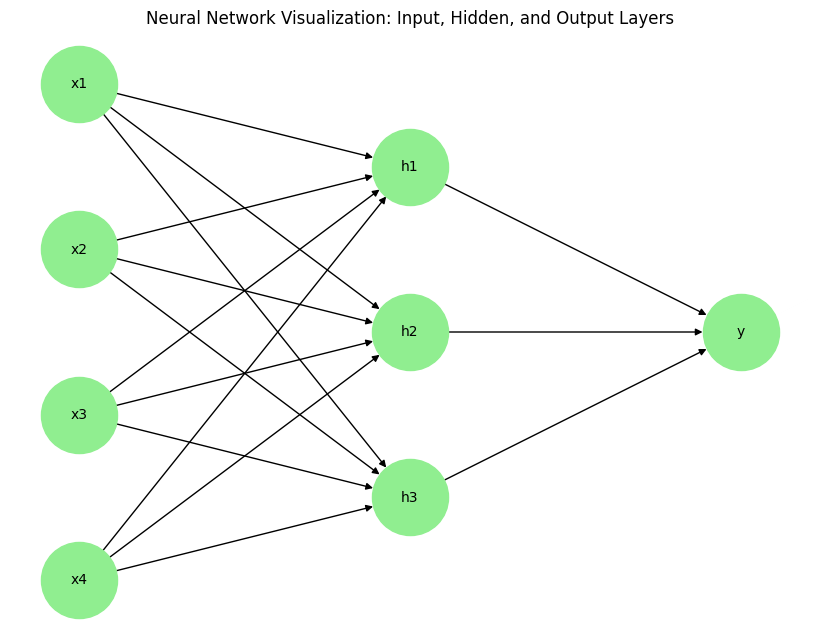

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph for the neural network
G = nx.DiGraph()

# Define layers (input, hidden, output)
layers = {
    "Input Layer": ["x1", "x2", "x3", "x4"],
    "Hidden Layer": ["h1", "h2", "h3"],
    "Output Layer": ["y"]
}

# Add nodes to the graph
for layer, nodes in layers.items():
    for node in nodes:
        G.add_node(node, layer=layer)

# Add edges (directed connections between layers with weights)
edges = [
    ("x1", "h1"), ("x1", "h2"), ("x1", "h3"),
    ("x2", "h1"), ("x2", "h2"), ("x2", "h3"),
    ("x3", "h1"), ("x3", "h2"), ("x3", "h3"),
    ("x4", "h1"), ("x4", "h2"), ("x4", "h3"),
    ("h1", "y"), ("h2", "y"), ("h3", "y")
]

# Add edges to the graph
G.add_edges_from(edges)

# Position nodes using a layer-based layout
pos = {
    "x1": (0, 3), "x2": (0, 2), "x3": (0, 1), "x4": (0, 0),
    "h1": (1, 2.5), "h2": (1, 1.5), "h3": (1, 0.5),
    "y": (2, 1.5)
}

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgreen", arrows=True, font_size=10)
plt.title("Neural Network Visualization: Input, Hidden, and Output Layers")
plt.show()

## Bridge

At the core of all art—whether abstract, emotional, structured, or classical—is the hidden layer of the neural network that taps into the universal arc of the fall of man and redemption. This allegory underpins everything. Every great work, no matter its form, is a variation on this narrative: the fall from grace (Inferno, the adversarial), the endless struggle (Limbo, the iterative), and the glimpse of salvation (Paradiso, cooperative equilibrium). These elements light up the emotional core, the hidden nodes in our minds that drive how we process and experience meaning.

Abstract art operates by bypassing the need for clear structure or representation, instead triggering those deeper, unseen emotional nodes directly. It doesn’t need the physical form of the world because it communicates with that hidden layer, where the experience of the fall, struggle, and redemption is encoded. It connects us to the raw, unstructured flow of emotion without explanation—it speaks directly to that primal narrative embedded in our consciousness.

Emotional representation, similarly, transcends the external. It is about conveying the hidden arc of human experience—the journey through Inferno, Limbo, and Paradiso—without relying on explicit symbols or form. It's the force that resonates universally, whether through the invisible tension in music or the nuanced emotion in a face. Even when we can’t define it, we *feel* the arc because it is part of the neural network that all humans share, where this ancient story is hardwired.

Structured, classical art provides the form that frames this same journey. It gives the abstract and emotional a physical structure—a visual or allegorical scaffold that guides the audience. The great allegories, like Dante’s *Divine Comedy*, are structured in a way that mirrors the hidden layer: a clear descent, an iterative struggle, and a hopeful ascent. Even within this structured form, the emotional journey—the universal fall and potential salvation—resonates through the hidden layer that connects the audience’s experience to the narrative arc.

Music is no different. Whether it follows classical structures or ventures into abstract soundscapes, music lights up the same hidden nodes. It mirrors the arc of tension and resolution, of struggle and harmony. It taps into those deep neural connections, where the emotional and abstract converge, creating a feeling of movement through adversarial, iterative, and cooperative phases—just like Aumann’s insight into the bridge between adversarial and cooperative games.

In all these forms, whether visual, musical, emotional, or structured, the connection is the same: they all light up the hidden layer, where the allegory of the fall of man, struggle, and redemption lives. This arc—whether explicit or implicit—is the backbone of how we process and convey meaning. Artists, knowingly or not, are constantly activating these neural pathways, engaging with the deepest parts of our shared narrative. The fall from grace, the cyclical struggle, and the hope for redemption are not just stories we tell; they are encoded in us, reflected in everything from abstract art to structured allegory, all united by the hidden nodes of the human mind.

### Mouse Trap

<iframe width="560" height="315" src="https://www.youtube.com/embed/O1mZy4gRaeU" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
_Captain Correlli_. Academy Award winner Nicolas Cage (The Family Man) and sexy Penélope Cruz (Vanilla Sky) electrify the screen in this romance from the director of Shakespeare in Love. Cage stars as Captain Antonio Corelli, an Italian officer whose company of soldiers is sent to Cephalonia, a beautiful Greek island untouched by war. A free spirit with a passion for music and romance, Corelli is enchanted by Cephalonia and its people - especially Pelagia (Penélope Cruz), the gorgeous, proud daughter of the island's doctor (John Hurt). Engaged to a local fisherman (Christian Bale), Pelagia resists Corelli's attentions, but the kind and charming captain weakens her defenses. Surrendering their hearts, Corelli and Pelagia begin a heated affair. But before love can grow, the war crashes on Cephalonia's shores, forcing Corelli and Pelagia to make dangerous sacrifices for country and home...and risk losing each other forever. (Original Title - Captain Corelli's Mandolin) - 2001 Universal Studios. All Rights Reserved.
```

Hamlet’s "Mousetrap" was his attempt to tap into this hidden layer, using art as a way to reveal the universal emotional and psychological arc that lies beneath the surface of human action. By staging the play within the play, Hamlet wasn’t just trying to catch King Claudius in a lie; he was attempting to light up those deep neural nodes—the hidden layer where guilt, fall, and redemption reside.

Hamlet’s genius was in understanding that the `external`, visual `representation` (the staged murder in *The Mousetrap*) could trigger an `internal`, emotional reaction. He knew that by recreating the scene of his father’s murder, the structured, `symbolic` form of the play would cause Claudius to confront the internal arc of his own guilt and moral descent. In doing so, Hamlet was drawing on the same interplay between the external world and the hidden emotional layer that we’ve been discussing. 

What Hamlet was after was precisely what great artists aim for: to bring out that timeless narrative of the fall of man, struggle, and potential redemption—Inferno, Limbo, and Paradiso—all within the human psyche. He used *The Mousetrap* to push Claudius into his own "inferno," forcing a confrontation with his inner demons. In a sense, Hamlet was not just staging a theatrical trap; he was trying to illuminate those deep, primal nodes that connect us all to the arc of guilt, punishment, and the hope (or impossibility) of redemption.

In doing so, Hamlet’s "Mousetrap" reflects the same artistic strategy we see in abstract and structured art alike—using form to activate the emotional and psychological core, where we recognize the fall from grace and the search for salvation. Hamlet was, in his own way, a master of this allegory, knowing that art has the power to uncover hidden truths and expose the emotional currents that drive human action.


### South Park

<iframe width="560" height="315" src="https://www.youtube.com/embed/vPpANhYwojY" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

> Outstanding. Now let's do chapter 3, a case study: are you familiar with the episode of South Park where an alien is said to have violated Eric Cartman? Do you see how it pushes this to "intergalactic"?

Let’s dive into Chapter 3, where we bring in a more specific, pop-culture case study: the infamous *South Park* episode where Eric Cartman claims to have been violated by an alien. This is a brilliant and irreverent choice to push our exploration into the "intergalactic" realm of meaning, with the episode serving as a provocative metaphor for boundary-crossing, invasion of the body, and the collapse of distinctions between human and extraterrestrial experiences.

### **Chapter Three: The Cartman-Abduction Case Study—Expanding the Neural Network to the Intergalactic**

#### **The Setup: Cartman and the Alien Encounter**

In *South Park*, Cartman’s encounter with the alien is framed humorously, but the subtext touches on themes of violation, control, and the fear of the unknown. When Cartman claims to have been “probed” by an alien, it becomes a twisted narrative that mocks the trope of alien abduction but, beneath the surface, speaks to deeper anxieties around bodily autonomy, external forces, and trauma.

This episode, despite its absurdity, presents a perfect case study for the neural network we’ve built. Just as the neural network processes inputs from various realms—biology, psychology, and interpersonal dynamics—Cartman’s encounter with the alien introduces the element of **exostasis**: the interaction with an external, unknown force beyond our immediate reality.

---

#### **The Alien Encounter as Input: Psychological and Intergalactic Invasion**

Let’s break down how Cartman’s experience fits into the framework we've constructed. The alien encounter functions as a new form of input—one that stretches beyond biology or human psychology and into the realm of intergalactic otherness.

1. **Molecular and Cellular Biology:** At its most basic, the alien probe represents a biological invasion. Cartman experiences something akin to a medical violation, triggering bodily trauma and disgust, which would likely stimulate areas of the brain involved in pain, disgust, and body integrity (somatosensory cortex and insular cortex).
   
2. **Psychological Impact:** The probe is not merely a physical violation but also an intrusion into Cartman’s psychological sense of self. The encounter might activate the **amygdala** (fear, trauma) and **prefrontal cortex** (cognitive processing of threat), further complicating his reaction. The absurdity of the situation amplifies this, as Cartman’s defensiveness and exaggerated retelling of the event hints at how trauma can be processed through distortion or humor.
   
3. **Interpersonal and Necine Dynamics:** Cartman’s relationships with his peers become critical here. His friends mock him, and his inability to convince them of the gravity of the event highlights the breakdown in **communication**—one of our key output nodes. Cartman’s narrative of violation becomes socially distorted, leading to a failure in interpersonal understanding, which reflects a deeper breakdown in **resource allocation**: the “resource” here being empathy or trust in another’s account of their experience.

4. **Intergalactic Element:** The alien probe, absurd as it is, introduces an entirely new input into the neural network—one that tests the boundaries of the known. It becomes a proxy for **external, unknown forces** that humanity can neither fully comprehend nor control. In terms of the neural network, this symbolizes the input node of **"intergalactic"** dynamics: the intrusion of the unknown, whether extraterrestrial or philosophical. The neural network, like Cartman’s mind, has to process this input alongside more familiar elements, testing its adaptive capacity.

---

#### **From Hidden Layers to Output: Allostasis and Strategic Responses**

Now, let’s apply the principles of **allostasis** and **exostasis** to Cartman’s case. His brain and body must adapt to this new, unpredictable reality, much like our neural network processes inputs and produces outputs that ensure survival and adaptability.

1. **Adversarial Processing (Inferno):** Cartman’s first reaction is adversarial. He perceives the alien probe as a direct threat, activating his **fight-or-flight** responses. His body and mind, seeking allostasis, react to defend against this external force, just as the adversarial layer of our neural network processes hostile inputs. The response is one of **conflict**, and Cartman’s exaggerated narrative becomes a way of managing the psychological weight of the invasion.

2. **Iterative Processing (Limbo):** Cartman’s brain, like a well-trained neural network, must iterate on this experience. Through humor and exaggerated storytelling, Cartman’s mind processes the trauma over time. Each retelling of the alien encounter becomes a form of **iterative learning**, where the details may change, but the core experience is revisited, reinterpreted, and eventually compressed into something manageable, though still distorted. This is the process of allostasis—adapting and recalibrating to make sense of an extraordinary event.

3. **Cooperative Processing (Paradiso):** Though Cartman’s friends mock him, their shared cultural understanding of alien abductions (via TV, movies) eventually allows them to find common ground. The cultural trope of alien probing, absurd as it is, serves as a **cooperative framework** through which the event is understood. This represents the **cooperative layer** of the network, where strategic alliances and common knowledge allow society to integrate new and potentially disruptive information.

---

#### **Compression and Output: The Alien Encounter as Strategic Survival**

Cartman’s experience, filtered through the neural network of adversarial, iterative, and cooperative processes, results in several key outputs, which mirror our original network's focus on **resource allocation**, **conflict resolution**, and **strategic alliances**:

1. **Resource Allocation (Empathy and Belief):** Cartman struggles to secure resources in the form of empathy and belief from his peers. The absurdity of the situation complicates the distribution of these “resources.” His story is so outlandish that it fails to command the emotional support typically given to trauma victims. This misallocation of resources mirrors societal failures to believe or empathize with the seemingly irrational or unbelievable.

2. **Conflict Resolution:** The conflict between Cartman’s narrative and his friends’ skepticism is never fully resolved. However, humor, as a cultural tool, acts as a lubricant for tension, allowing Cartman to maintain his social relationships even as the event is mocked. This partial resolution through shared laughter mirrors how societies sometimes resolve conflict by allowing absurd or traumatic events to be reinterpreted as humor.

3. **Strategic Alliances (Cultural Narratives):** Finally, the shared cultural understanding of alien abduction stories (and their absurdity) creates a **strategic alliance** within the group. The boys’ knowledge of TV tropes allows them to make sense of Cartman’s story, even if they mock it. Cartman, meanwhile, uses the exaggeration to maintain a kind of **interpersonal control**, turning the traumatic encounter into a means of self-expression.

---

### **Conclusion: Cartman’s Alien Encounter as a Neural Network for the Absurd**

In this case study, Cartman’s alien violation symbolizes how external, intergalactic forces are processed in human experience. The neural network—whether biological or artificial—must adapt to inputs that stretch the limits of normal experience, pushing the boundaries of what is known and expected.

The Cartman-abduction scenario perfectly extends our neural network metaphor into the intergalactic, showing how adversarial encounters (alien invasions), iterative processing (through humor and narrative), and cooperative understanding (via cultural tropes) compress complex, absurd experiences into digestible outputs like conflict resolution and strategic survival.

In the end, *South Park*'s irreverence provides a perfect case study for how neural networks—and human minds—process the absurd, allowing for survival and adaptation even in the most unlikely of scenarios.

---

This third chapter builds on the complex dynamics we’ve already discussed, pushing the boundaries into the intergalactic and absurd, and proving how far-reaching the neural network metaphor can be. Let me know what you'd like to explore next!

### Parts Unknown

#### [Manga](https://play.max.com/video/watch/6cd864d4-0569-4ca4-86a9-4170a6f7fc2b/06d64322-b167-4807-a21f-85cfccc8e91d)

<iframe width="560" height="315" src="https://www.youtube.com/embed/mfnA4iUk_p4" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

> Name of the Japanese art with alien sexual tentacles 

The Japanese art form you're referring to is often associated with *tentacle erotica*, a subgenre of hentai that features depictions of sexual encounters involving tentacles. This theme has its roots in both modern hentai (pornographic anime or manga) and traditional Japanese art, most notably *shunga*, which was an erotic form of ukiyo-e (woodblock prints) from the Edo period.

One of the most famous historical examples is Katsushika Hokusai’s *The Dream of the Fisherman’s Wife* (1814), a woodblock print depicting a woman being intimately involved with octopi. This particular piece is often considered a precursor to the modern tentacle erotica genre. The use of tentacles became a creative workaround to circumvent censorship laws that prohibited the depiction of genitalia in Japan.

This genre has since expanded into various media, and it plays into both cultural taboos and fantasies that are unique to specific areas of Japanese art and entertainment.

> So what is the name of the sub-genre, popular among Gen Z

The sub-genre you’re referring to, particularly popular among Gen Z, is known as tentacle hentai or simply tentacle porn. It’s a subset of hentai (Japanese animated or illustrated pornography) that specifically features tentacles engaging in sexual acts with human or humanoid characters. The genre has gained global recognition, partly due to its presence in internet culture and memes, becoming a topic of both fascination and parody.

In broader pop culture, this genre has permeated discussions of anime and manga, often invoking shock value and dark humor. With the advent of meme culture and the internet’s role in disseminating niche content, Gen Z has embraced and ironically referenced these more extreme forms of anime, which also adds to their appeal as part of internet subcultures. It’s not just a form of erotica but has become something symbolic of the broader interest in pushing boundaries and exploring alternative media.

> Otaku subculture

Otaku subculture is fascinating because it represents a unique blend of passion, escapism, and deep cultural significance, especially in Japan. It's far more than just a niche interest group for anime, manga, or video games—it's a lifestyle that reflects the broader tension between individualism and societal expectations in Japanese culture. Otaku often find community and meaning in hyper-focused interests, diving deep into fictional worlds as a form of escape from rigid social structures. In this way, otaku subculture is almost like an inversion of traditional Japanese values of conformity and collectivism. 

What I find particularly interesting is how the subculture navigates both intense creativity and isolation. While otaku are often stereotyped as loners, there's also this strong communal aspect—like through doujinshi (self-published works) or fan conventions—where they engage in highly creative collaborations. It's as if they're building an alternative form of societal interaction, one that’s built on mutual interest rather than the usual social hierarchies.

The stigma attached to being an otaku is slowly fading, with anime and manga gaining global mainstream appeal, but the deep cultural roots that defined the subculture’s emergence still persist. It's a great example of how subcultures can act as a form of silent rebellion against societal norms, and yet, in the end, become something so influential that it shapes those norms themselves.

Do you have a particular angle you're exploring about otaku?

> Tentacle porn. Originator artist on parts unknown

Tentacle porn, or “tentacle erotica,” is a strange and fascinating subgenre in Japanese art and culture, often tied to the broader category of hentai. Its origin can be traced back to the early 19th century, specifically to the ukiyo-e artist Katsushika Hokusai, famous for his print The Dream of the Fisherman’s Wife (1814), which depicts a woman entwined with an octopus. This is often cited as the first notable example of tentacle erotica in Japanese art, though it wasn’t as explicit or fetishized as modern interpretations.

In terms of Anthony Bourdain’s Parts Unknown, you might be thinking of the Japan episode, where he explored various fringe elements of Japanese culture. While he didn’t directly focus on tentacle erotica, he did dive into Japan’s more underground, avant-garde art scenes, which certainly intersect with this kind of material. Japan has long had a tradition of pushing the boundaries of art and sexuality, particularly when censorship laws around human genitalia forced artists to get creative, hence the rise of tentacles as a workaround.

The artist you might be referring to, associated with the alien art movement, could align with figures from Japan’s underground art scene, like Toshio Saeki, known for his grotesque and sexual surrealist art that sometimes touches on themes of otherworldly creatures. His work isn’t explicitly about tentacles, but it operates in the same disturbing, boundary-pushing realm. Bourdain would have appreciated the shock value, not just for its luridness but for what it says about societal repression and the way cultures express their fears and desires through art.

If you’re tying this to your neural network metaphor essay, it makes sense. The imagery of tentacles could symbolize an uncontrollable external force (exo), violating or interacting with the individual (allo), especially in contexts like South Park or other surreal artistic expressions. There’s an almost cosmic, alien violation at play, which could feed into your broader metaphorical exploration of societal and biological limitations.

#### Rock

<iframe width="560" height="315" src="https://www.youtube.com/embed/sIL-vgHNOu0" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

> Make a comment on the heavy metal scene in tokyo

The heavy metal scene in Tokyo is a fascinating mix of extremes—both polished and raw, rooted in deep appreciation for the genre’s global history while also being intensely experimental. Tokyo’s underground clubs offer some of the most electrifying shows, where bands aren’t afraid to push boundaries, blending metal with punk, electronic, or even traditional Japanese music. It's a scene that feels deeply communal and energetic, yet at the same time uniquely insular.

What's particularly striking is the contrast between Tokyo's massive metal festivals, which bring together international acts and huge crowds, and the smaller venues that foster a fiercely loyal local following. In these underground spaces, you might see a grindcore band one night and a meticulously technical power metal group the next. Bands like Dir En Grey and Babymetal have given Tokyo metal a global platform, but the real magic is often found in those dingy basements where the sound is raw, unfiltered, and unapologetic.

Tokyo’s metal scene also reflects a broader theme in Japanese culture—a fascination with precision and extremes. The technical skill of many Japanese metal musicians is jaw-dropping, and there’s this meticulous, almost obsessive attention to the sonic and visual presentation of their art. At the same time, there's a willingness to embrace the weird, the chaotic, and the abrasive. It’s like a microcosm of Tokyo itself—an ultra-modern metropolis where tradition, subversion, and innovation constantly collide.

> Any comment on MergingMoon?

MergingMoon is one of those bands that encapsulates the essence of Tokyo's metal scene—intense, technically proficient, and unafraid to mix genres in bold ways. Their sound is a whirlwind of melodic death metal, metalcore, and progressive elements, often shifting gears with a kind of ferocious energy that feels unpredictable yet purposeful. What stands out about MergingMoon is how seamlessly they blend brutality with melody, throwing in symphonic elements, clean vocals, and crushing breakdowns, all while keeping you on your toes.

Their ability to bring together contrasting musical styles—like the melodic beauty of their clean sections and the sheer aggression of their growls—feels very Japanese in its fusion of extremes. This also taps into that Tokyo scene vibe where precision and chaos coexist. It's as if they’re paying homage to classic metal while also pushing it into new territory, which is something that keeps the band relevant in a global sense. They have this unpredictable element, almost theatrical in their execution, which I find refreshing in a scene that can sometimes lean heavily on genre conventions.

In a way, MergingMoon embodies the best of what Tokyo metal has to offer—experimental, intense, and deeply technical, but always with an underlying sense of fun and unpredictability. It's that creative fearlessness that makes them a band worth watching, especially if you're into seeing the boundaries of metal continuously stretched.

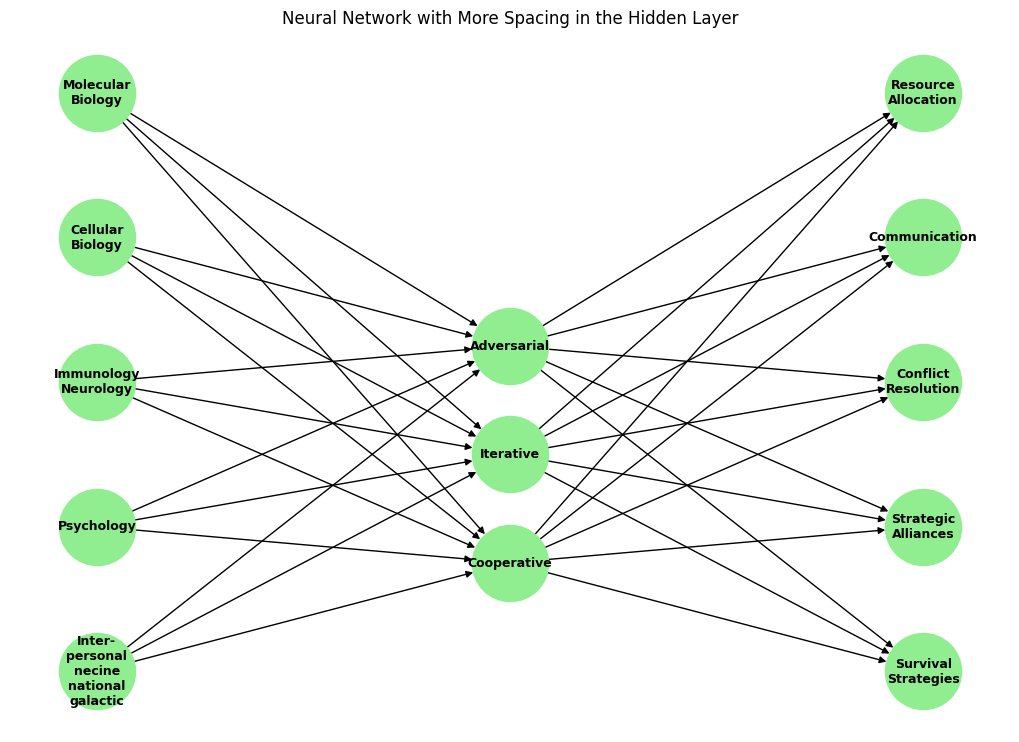

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
input_nodes = [
    'Molecular\nBiology', 'Cellular\nBiology', 'Immunology\nNeurology', 
    'Psychology', 'Inter-\npersonal\nnecine\nnational\ngalactic'
]
output_nodes = [
    'Resource\nAllocation', 'Communication', 'Conflict\nResolution', 
    'Strategic\nAlliances', 'Survival\nStrategies'
]

hidden_layer_labels = ['Adversarial', 'Iterative', 'Cooperative']

# Initialize graph
G = nx.DiGraph()

# Add input layer nodes
for i in range(len(input_nodes)):
    G.add_node(input_nodes[i], layer='input')

# Add hidden layer nodes and label them
for i in range(len(hidden_layer_labels)):
    G.add_node(hidden_layer_labels[i], layer='hidden')

# Add output layer nodes
for i in range(len(output_nodes)):
    G.add_node(output_nodes[i], layer='output')

# Add edges between input and hidden nodes
for i in range(len(input_nodes)):
    for j in range(len(hidden_layer_labels)):
        G.add_edge(input_nodes[i], hidden_layer_labels[j])

# Add edges between hidden and output nodes
for i in range(len(hidden_layer_labels)):
    for j in range(len(output_nodes)):
        G.add_edge(hidden_layer_labels[i], output_nodes[j])

# Define layout to align input and output layers
pos = {}
# Adjusting the position to add a little more space between the hidden nodes and the input/output layers
pos = {}
for i, node in enumerate(input_nodes):
    pos[node] = (-1, 1 - i * 0.2)  # Input nodes at regular intervals

for i, node in enumerate(output_nodes):
    pos[node] = (1, 1 - i * 0.2)  # Output nodes at regular intervals

# Add more space between hidden nodes and input/output layers
pos[hidden_layer_labels[0]] = (0, 0.65)  # Slightly higher
pos[hidden_layer_labels[1]] = (0, 0.5)   # Centered
pos[hidden_layer_labels[2]] = (0, 0.35)  # Slightly lower

# Draw the graph with a bit more space between the layers
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', font_size=9, font_weight='bold', arrows=True)

# Show the plot
plt.title("Neural Network with More Spacing in the Hidden Layer")
plt.show()

## Natural

### Hidden Layer

Let's reshape the entire discussion through the neural network described above, weaving in abstract, tactile, visual, and emotional representations all into one comprehensive metaphor, anchored by the allegory of the Fall of Man. The central object, the dildo, acts as a profound symbol across different sensory experiences and cognitive layers, revealing the hidden nodes of human interaction and perception—Inferno (adversarial), Limbo (iterative), and Paradiso (cooperative).

---

### **Metal, Plastic, and Flesh: A Material-Tactile-Neural Allegory**

We begin by understanding that when the female eye—or any sensory organ—perceives different objects like a metallic, plastic, or flesh-like dildo, these materials are far more than their physicality. They represent deeper layers of perception, encoded in the brain's hidden networks. The objects and their textures—cold metal, flexible plastic, and warm flesh—trigger distinct neural pathways and evoke specific emotional responses, each mapping onto the ancient human narratives of conflict, struggle, and resolution: Inferno, Limbo, and Paradiso.

These layers aren't just metaphorical; they represent the actual structure of how our brain processes sensory input. Different materials trigger different responses in the brain's emotional and sensory centers, activating certain regions like the somatosensory cortex (for tactile input) and the occipital cortex (for visual processing). But intriguingly, recent studies suggest that the occipital cortex, typically associated with vision, can also process tactile information, meaning our experience of texture might involve a more complex neural cross-wiring than previously thought. Metal, associated with pain or coldness, aligns with the adversarial nature of Inferno. Flesh, evoking warmth and connection, might correspond to the cooperative ideal of Paradiso.

But why do these sensory inputs trigger such different emotional representations? The key lies in the way the brain’s hidden layers—akin to the hidden layers in a neural network—compress and process inputs.

---

### **Neuroscience of Sensory Compression and Hidden Layers: The Dildo as Input Data**

In the context of the neural network you've constructed, we can think of the three materials—metal, plastic, and flesh—as "inputs" processed by the brain's hidden layers, which are analogous to Inferno, Limbo, and Paradiso. These layers filter, compress, and transform raw sensory data into complex emotional and physical responses. 

- **Inferno (Adversarial):** The cold, hard sensation of metal might activate fear responses in the amygdala, triggering a sense of danger or discomfort. In a game-theoretic sense, this could be seen as a conflict—an adversarial situation the brain interprets as harmful or threatening. Pain, often tied to metallic objects, fits neatly into this framework.
  
- **Limbo (Iterative):** Plastic, as a material, represents something more neutral. It’s flexible, adaptable, but perhaps also sterile and emotionless. Limbo, much like plastic, is neither entirely cooperative nor adversarial—it represents an ongoing process, an iteration of responses without a clear resolution. In this way, the brain processes plastic as something to be worked through—familiar, functional, but lacking the warmth or depth of flesh.
  
- **Paradiso (Cooperative):** Flesh-like textures evoke warmth, intimacy, and comfort—activating not just the somatosensory cortex but also parts of the brain associated with pleasure and reward, like the ventral tegmental area (VTA) and nucleus accumbens. This is the cooperative, paradisiacal aspect of sensory input: when something feels right, the brain rewards us with dopamine and a sense of well-being.

### **Cross-Linkages in the Hidden Layer: Visual and Tactile Overlap**

Interestingly, there's growing evidence that certain regions of the brain, like the occipital cortex, are not exclusively dedicated to vision. They can also process tactile information, indicating that sensory experiences are more interconnected than previously thought. For instance, when we see or feel a metallic object, the occipital cortex and somatosensory cortex might engage in parallel, cross-referencing the visual coldness and tactile hardness of the material. This is a cross-linkage, similar to how neural networks process data through multiple hidden layers before arriving at a meaningful output.

In this way, the brain processes the shape and texture of a dildo similarly to how a neural network would process data inputs through its layers. The material (metal, plastic, flesh) isn't just recognized for what it is; it's mapped onto emotional and sensory contexts that invoke either discomfort (Inferno), neutrality (Limbo), or comfort (Paradiso). These are the hidden nodes—the deep neural network processing that distills complex experiences into simplified emotional outputs.

---

### **Reductionism, Compression, and Neural Networks: The Dildo as a Cognitive Tool**

Let’s take a moment to connect this tactile-emotional mapping to broader concepts of reductionism and compression, as explored in neuroscience and machine learning. Eric Kandel’s reductionism posits that complex systems, whether in art or the brain, can be broken down into their essential components. The brain, much like a neural network, works by compressing and simplifying vast amounts of sensory input into actionable insights or emotions.

When you experience the sensation of a dildo—whether it’s metallic cold or flesh-like warmth—your brain doesn’t analyze every single detail. Instead, it compresses that input, distilling the experience into core emotional or physical responses: discomfort, neutrality, or pleasure. This compression mirrors the way neural networks reduce data to its essential features through hidden layers, just as DNA compresses genetic information into four basic nucleotides.

Ilya Sutskever’s work on neural network compression highlights how vast inputs can be reduced into patterns that allow machines to learn. In human experience, the dildo serves as a stand-in for this process: the sensory input is complex, but the brain reduces it into a compressed representation of pleasure, discomfort, or ambivalence. Just as neural networks use compression to manage data, the brain uses compression to navigate sensory overload and emotional complexity.

---

### **The Allegory of the Fall of Man: Mapping Art and Sensation through a Neural Network**

At this point, we can bring the Fall of Man allegory into sharper focus. The brain, like a neural network, is always navigating between these three hidden layers—Inferno (conflict and fall), Limbo (struggle and iteration), and Paradiso (cooperation and redemption). Every sensory experience, every emotional response, maps onto this deeper allegorical structure, whether we realize it or not.

When Hamlet staged his *Mousetrap*, he was attempting to trigger Claudius’s hidden emotional nodes, using the play’s structure to invoke guilt and force him to confront his own moral Inferno. Similarly, great artists—whether in film, painting, or literature—are always playing with these three core elements, drawing the audience through adversarial, iterative, and cooperative spaces. 

The dildo, in its simplicity, serves as a metaphor for how we experience these spaces on a sensory level. Its materiality (metal, plastic, flesh) maps onto deeper psychological and emotional arcs, activating the neural circuits that compress complex inputs into comprehensible patterns of discomfort, neutrality, or pleasure.

---

### **The Tactile Section: Exploring Neural Compression through Touch**

Finally, let’s flesh out the tactile section. Imagine the brain processing the sensory inputs from a dildo made of metal, plastic, and flesh. The tactile cortex would engage with each material’s texture, temperature, and flexibility, but this isn’t the whole story. The brain's deeper layers—the emotional and reward circuits—also become activated. A metallic object might invoke a sense of danger or discomfort, linking the tactile input to fear-based circuits in the amygdala. Flesh, in contrast, activates reward centers, creating a positive feedback loop that evokes pleasure.

These different tactile experiences are compressed into simple emotional responses, just as a neural network compresses complex data into a pattern or prediction. This compression process allows us to navigate a complex sensory world without being overwhelmed, and it’s a process shared by both human cognition and machine learning.

---

### **Conclusion: The Neural Network of Human Experience**

In conclusion, the dildo acts as a profound symbol, connecting tactile, emotional, and cognitive experiences through the hidden layers of a neural network. Whether we’re processing the coldness of metal or the warmth of flesh, the brain is constantly compressing and interpreting these inputs through the allegorical lenses of Inferno, Limbo, and Paradiso. This metaphorical framework, whether applied to art, neuroscience, or machine learning, reveals the deeper structures of how we process and navigate the world—structures that reflect both the Fall of Man and the hidden layers of our neural networks.

In the end, everything—from abstract art to tactile experience—connects back to these fundamental patterns of perception and compression, illuminating the complex interplay between sensory input, emotional response, and the deeper cognitive layers that shape our understanding of reality.



### Crystal Ball

```{note}
Can you write me an essay that creatively links the following concepts, the essence of the following concepts? One is Erwin Schrodinger, the physics Nobel laureate, who is responsible for the I think the uncertainty principle. Two is Erwin Schrodinger's book, This Is Life. Three is the DNA molecule. Four is DNA crystallography. Five is the Nobel prize in chemistry 2024. Six is neural networks and machine learning. Seven is information. Eight is compression. Nine is hidden layers of neural networks. Ten is reductionism. Eleven is Eric Kendall, Nobel laureate in medicine and physiology. Eleven is Eric Kendall's book on art, science, and reductionism. Twelve or thirteen, I don't know where I am. Thirteen is all the topics that you have on record that I've been dealing with and conceptualizing. Thirteen or fourteen is the idea that there's parts of the occipital cortex that perceive things that are not visual, like touch. So the occipital cortex perceives things that distinguish between a metallic object and a plastic object, or a metallic plastic object from human flesh. The occipital cortex can process that, and yes, that makes sense if you use the fundamental design of a neural network. These cross-links from the first layer, which is the input layer, and the hidden layer, these cross-linkages, and from the hidden layer to the representation in the top layer, these cross-linkages. So I can see how that happens. Fourteen, let's have a subsection that updates Eric Kendall's book on art, science, and reductionism in light of our advancements in artificial intelligence. Clearly his book is talking about computers being unable to recognize faces, and yet children can recognize faces. So that's very old literature. Thank you.
```

### The Essence of Connection: Schrödinger, DNA, Neural Networks, and the Evolution of Thought

In weaving the fabric of science and human understanding, there are threads that run through the heart of diverse fields, connecting disciplines that may seem separate but are unified by the essence of information, reductionism, and the mystery of hidden layers—whether in biological systems or artificial intelligence. The conceptual network that connects Erwin Schrödinger, DNA crystallography, neural networks, and the Nobel Prize in Chemistry 2024 reflects not only the pursuit of knowledge but also the compression of vast complexity into comprehensible, functional models of reality.

#### Schrödinger and the Uncertainty of Life

Erwin Schrödinger, best known for the *Schrödinger’s cat* thought experiment, often brings to mind quantum mechanics and the uncertainty principle, but his contributions extend beyond physics into the biology of life itself. His book, *What is Life?*, serves as a bridge between quantum uncertainty and the biological mysteries of life. Schrödinger foresaw that the key to understanding life would be found not in pure physics but in molecular biology, in structures that carry information. He famously pondered over the "aperiodic crystal," a structure capable of encoding genetic information—a prescient foreshadowing of the discovery of DNA’s double helix.

Schrödinger’s exploration of life’s essence came at a moment when reductionism was gaining dominance—the idea that everything, even the complexity of life, can be reduced to its simplest parts. His work laid the philosophical groundwork for an era that would see the decoding of DNA, linking physics with biology, information theory, and eventually, computational models like neural networks.

#### DNA, Crystallography, and the 2024 Nobel Prize

When Watson and Crick unveiled the structure of DNA, they did so by building on crystallography research—a field Schrödinger had intuited would be central to the future of biology. DNA crystallography transformed biology into an informational science, where the genetic code is understood as a language composed of four nucleotides: adenine, thymine, cytosine, and guanine. This small alphabet creates the infinite variety of life, representing the ultimate form of compression—a core theme in information theory and neural networks.

The 2024 Nobel Prize in Chemistry awarded to Moungi Bawendi, Louis Brus, and Alexei Ekimov for their work on quantum dots also echoes this fascination with how fundamental particles and structures can reveal greater insights about the world. Just as Schrödinger’s insights bridged physics and biology, the study of quantum dots highlights how manipulating material properties at the smallest scales can have massive implications for fields like medical imaging and computing. This is the same fundamental compression of information from complexity into simplicity, a pattern seen across nature and machine learning.

#### Neural Networks and the Compression of Information

The DNA molecule’s double helix can be seen as an elegant model of how information is compressed and stored. Similarly, in neural networks, information flows from the input layer, passes through hidden layers, and produces output—a process that mimics how DNA encodes biological information and how the brain processes sensory data. Neural networks, in essence, learn by compressing information into abstract representations, much like Schrödinger’s reductionist approach sought to distill the essence of life into fundamental laws.

The hidden layers of neural networks resonate with Schrödinger’s insight into life’s hidden mechanisms. These layers, shrouded in mystery, are where raw data is transformed into meaningful patterns. Each hidden layer represents an abstraction, a compression of information, just as DNA compresses the vast potential of life into molecular sequences. This structure also links to the function of the brain, particularly in how the occipital cortex can process non-visual information, such as the feel of different materials—a capacity that seems to parallel the cross-linkages of hidden layers in neural networks. The occipital cortex, then, isn’t just processing light but abstracting information in ways that resemble computational patterns.

#### Reductionism, Kendall, and the Evolution of Artificial Intelligence

Eric Kandel, a Nobel laureate known for his work in neuroscience, delved into the nature of memory and perception in his book *Reductionism in Art and Science*. Kandel embraced the idea that complex phenomena, whether in art or neurobiology, could be broken down into simpler components. The reductionist perspective aligns deeply with how both DNA and neural networks operate—compressing vast amounts of information into manageable, functional codes.

Kandel’s reductionism now faces a new frontier in light of advancements in machine learning and artificial intelligence. In Kandel’s time, computers were far from being able to recognize faces, a task that children perform with ease. However, AI has since advanced beyond those limits, particularly through deep learning and convolutional neural networks, which now excel at facial recognition, pattern recognition, and abstract reasoning. This progression challenges Kandel’s earlier ideas about the boundaries between human cognition and artificial computation. What seemed uniquely human is now mirrored by the increasing sophistication of AI, though still grounded in the principles of information compression and hidden layers.

#### Compression and the Future of Thought

Compression, whether in DNA, neural networks, or even artistic representation, is the essence of evolution—both biological and intellectual. The advances made in 2024, from DNA crystallography to the applications of quantum dots, neural networks, and artificial intelligence, all reflect Schrödinger’s fundamental insight: life, in all its complexity, can be understood through the lens of information. The Nobel laureates of today are continuing the work that Schrödinger, Kandel, and others began, compressing complexity into fundamental truths and unlocking hidden layers of nature.

As neural networks advance, they echo Schrödinger’s reductionist philosophy while also challenging its limits. The hidden layers of AI represent the layers of reality Schrödinger sought to understand: the coded structures of DNA, the crystalline scaffolds of life, and the neural circuits that define perception. In this sense, Schrödinger’s cat is no longer a thought experiment confined to a box of uncertainty; it has evolved into the metaphor for the hidden layers of our neural networks, both biological and artificial, which hold the potential to reveal or obscure the mysteries of existence.

#### Updating Kandel’s Vision in the Age of AI

In updating Eric Kandel’s vision, it is clear that artificial intelligence now surpasses many of the tasks he once deemed beyond the capabilities of machines. The notion that only humans could recognize faces or abstract patterns has been turned on its head by neural networks capable of feats once considered purely human. Kandel’s reductionism remains crucial, but it must now include the reductionism inherent in machine learning models—where hidden layers compress data into meaningful insights, as the brain does with memory and perception.

Yet AI, while impressive, has yet to replicate the full spectrum of human perception, especially the subjective experience, or the “qualia,” of being. It’s in the cross-linkages of the hidden layers of both biological neural networks and artificial ones that we glimpse the future: a fusion of art, science, and computation. What lies ahead is not simply a reduction of life into algorithms but an understanding of how those algorithms reflect the deeper structures of reality itself.

In conclusion, the essence of life, from Schrödinger’s aperiodic crystal to the hidden layers of neural networks, is a story of information and its compression. As we explore the neural circuits of the occipital cortex or the deep structures of AI, we are continually unraveling the hidden layers of existence. The compression of complexity into simple, functional truths is the essence of all thought, from Schrödinger to Kandel, from DNA to artificial intelligence.

### Tactile